In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2,mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
df=pd.read_csv("../../data/Car Insurance Claim Propensity/final_data.csv")

In [3]:
#overview of data
df.head()

Break In Period  Car Age Inception  Claim Freq  Claim loss_reported_period  \
0                2                7.0           9                          66   
1                3                6.0           7                          87   
2                9                6.0           2                          53   
3                9                6.0           7                          47   
4                6                3.0           2                          99   

   Claim occ_cycle                Manufacturer       RTO City  \
0               80                 Day-Shelton  Lake Johnview   
1               84                  Dennis LLC     Heidiburgh   
2               51     Smith, Waters and Adams     East Linda   
3               95  Pierce, Smith and Reynolds     Newtonfurt   
4               58                Phillips PLC   Michaelburgh   

         Policy Type Marital Status                    OCCUPATION  \
0   Our own renewals      NOT KNOWN              Insurance broker   
1       NCB Transfer      NOT KNOWN                Pharmacologist   
2   Our own renewals      NOT KNOWN         Engineer, maintenance   
3       MTHF Renewal      NOT KNOWN           Electrical engineer   
4   Our own renewals      NOT KNOWN  Medical sales representative   

                 CITY              Facility Name  Ageny Num        Surveyor  \
0       Stephanieview              Shaw and Sons    4089194      James Hunt   
1            Juanberg                  Jones PLC   58746732     Jason Jones   
2         Port Rachel            Campbell-Greene   88078634  Michael Zuniga   
3  North Michaelburgh  Banks, Collins and Miller   51769445   Kimberly Paul   
4        Margaretfurt            Perkins-Manning   68919640      Carol Lane   

  Type Of Payment       Geography  IDV Value              Claim Element  \
0             NaN      East Terri   274920.0               PARTIAL LOSS   
1   REIMBURSEMENT    Timothymouth   283000.0             NET OF SALVAGE   
2             NaN    Sarahborough   283000.0   OWNER DRIVER:BODY INJURY   
3             NaN       Tammyland   260040.0         OWNER DRIVER:DEATH   
4        CASHLESS  Port Christine   318840.0         OWNER DRIVER:DEATH   

  Claim Created Date Claim Status  
0    2/22/2019 20:52     Rejected  
1    10/21/2018 8:20     Rejected  
2     1/16/2019 7:45     Rejected  
3    12/14/2018 1:15     Rejected  
4     12/3/2018 4:11     Accepted

In [4]:
df.shape

(5000, 20)

In [5]:
df.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'Manufacturer',
       'RTO City', 'Policy Type', 'Marital Status', 'OCCUPATION', 'CITY',
       'Facility Name', 'Ageny Num', 'Surveyor', 'Type Of Payment',
       'Geography', 'IDV Value', 'Claim Element', 'Claim Created Date',
       'Claim Status'],
      dtype='object')

# Description

<ul>
    <li><b>Break In Period:</b> A break-in period is the time between the last date for renewal of car insurance and the date on which you renew the policy. For example, your policy renewal date is January 1 and you get it renewed on January 30, then the 30-day gap in between will be known as the break-in period. Your motor policy remains inactive during this time and if your vehicle faces any damage during this period, it will not be covered under the policy.Here in this column  used encoded number by insurance domain expert  or company for indicating situation</li>
     <br>
    <li><b>Car Age Inception:</b>Inception refers to the actual date that an insurance policy begins. ... The policyholder will continue to have this coverage until they cancel the policy, the coverage period ceases, or the insurance company suspends coverage due to a violation of the terms of the insurance contract.Here in this column  used encoded number by insurance domain expert or company for indicating situation </li>
    <br>
    <li><b>Claim Freq:</b>how many claim did by policyholder in the past.Here in this column  used encoded number by insurance domain expert  or company for indicating situation.<a href="https://www.resdac.org/cms-data/variables/claim-frequency-code-encounter#:~:text=The%20third%20digit%20of%20the,beneficiary's%20current%20episode%20of%20care">Claim Freq</a>
     </li>
    <br>
    <li><b>Claim loss_reported_period:</b> After the how many hour Claim reported ? means after the accident how many hours 
     take insurar for reporting this event.Here in this column  used encoded number by insurance domain expert or company for indicate situation </li>
     <br>
    <li><b>Claim occ_cycle:</b>occupational accident and contingent casualty period means drive injuries report time (medical report time).Here in this column  used encoded number by insurance domain expert or company for indicate situation  </li>
     <br>
    <li><b>Manufacturer:</b>Retailer Company</li>
     <br>
    <li><b>Note :</b>Here encoded code  i don't know what's meaning</li>    
    <br>
    <li><b>RTO City:</b>A Regional Transport Office (RTO) is an important organization in the life of a car owner. The RTO assumes significance right from the time you learn to ride a car. It is a Government agency entrusted with the responsibility of maintaining a database related to vehicles and their owners</li>
    <br>
    <li><b>Policy Type:</b> whcih type of policy owner take</li>
    <br>
    <li><b>Marital Status:</b> Owner married or not </li>
    <br>
    <li><b>OCCUPATION:</b>OCCUPATION </li>
    <br>
    <li><b>Facility Name:</b>Who is provide insurance facility?</li>
    <br>
    <li><b>Ageny Num:</b>Agent Number</li>
    <br>
    <li><b>Surveyor:</b>Who is surveyery this claim?</li>
    <br>
    <li><b>Geography:</b>Which place this accident or car loss?</li>
    <br>
    <li><b>IDV Value: If vehicle lost after then company paid </b></li>
    <br>
    <li><b>Claim Created Date:</b> which date claim request</li>
    <br>
    <li><b>Claim Status:</b>target feature </li>
     <br>
    
 </ul>  
 

##  Goal : Build machine learnig model for next future data will coming and that time we need to decide claim will be Approve or Denied 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Break In Period             5000 non-null   int64  
 1   Car Age Inception           4995 non-null   float64
 2   Claim Freq                  5000 non-null   int64  
 3   Claim loss_reported_period  5000 non-null   int64  
 4   Claim occ_cycle             5000 non-null   int64  
 5   Manufacturer                5000 non-null   object 
 6   RTO City                    5000 non-null   object 
 7   Policy Type                 5000 non-null   object 
 8   Marital Status              5000 non-null   object 
 9   OCCUPATION                  5000 non-null   object 
 10  CITY                        5000 non-null   object 
 11  Facility Name               5000 non-null   object 
 12  Ageny Num                   5000 non-null   int64  
 13  Surveyor                    5000 

# Data cleaning part

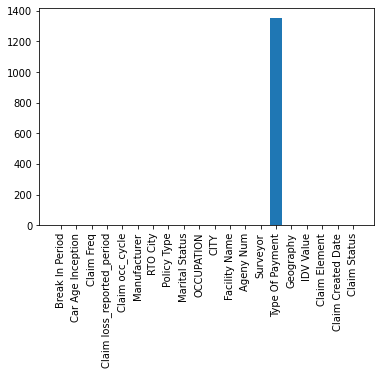

In [7]:
# missing data visulization 
l1=[]
l2=[]
for i in df.columns:
    x=sum(df[i].isnull())
    l1.append(x)
    l2.append(i)
plt.figure()
plt.bar(l2,l1)
plt.xticks(rotation=90)
plt.show()

    
    

In [8]:
df.rename({'Type Of Payment':'Type_Of_Payment'},axis=1,inplace=True)

In [9]:
df['Type_Of_Payment']

0                 NaN
1       REIMBURSEMENT
2                 NaN
3                 NaN
4            CASHLESS
            ...      
4995              NaN
4996         CASHLESS
4997         CASHLESS
4998         CASHLESS
4999         CASHLESS
Name: Type_Of_Payment, Length: 5000, dtype: object

In [10]:
#Here we are   replacing nan valuabse by 'Unknown' category'
df['Type_Of_Payment']=df['Type_Of_Payment'].fillna('Unknown')

In [11]:
df['Type_Of_Payment'].unique()

array(['Unknown', 'REIMBURSEMENT', 'CASHLESS', 'ASSIGNEE'], dtype=object)

In [12]:

print(df.nunique()) #result 1.0
res_1_0=dict(df.nunique())

Break In Period                 10
Car Age Inception               19
Claim Freq                      10
Claim loss_reported_period     100
Claim occ_cycle                100
Manufacturer                  4545
RTO City                      4296
Policy Type                      4
Marital Status                   1
OCCUPATION                     639
CITY                          4263
Facility Name                 4569
Ageny Num                     5000
Surveyor                      4835
Type_Of_Payment                  4
Geography                     4333
IDV Value                     3309
Claim Element                    4
Claim Created Date            4947
Claim Status                     2
dtype: int64


In [13]:
# According result 1.0 
#Here you can see  marrital status have only one unique value 
# and that value is also 'unknown' so we can drop this column(it's doesn't give us information)
df.drop('Marital Status',axis=1,inplace=True)

In [14]:
# Here in this columns we needs to find out important columns according to domain knowlegde
l1 = []
l2 = []
for i in res_1_0.keys():
    if(res_1_0[i] < 101 or i == 'IDV Value'):
            '''l1 is list whose contains important feature (
               how can we say that this is  important feature i will explain in letter cell ) '''
            l1.append(i)
    else:
        '''unimportant feature or columns'''
        l2.append(i)

In [15]:
''' why below feature is not important because they are catgorical and they have  too much 
unique value or category  and this feature will creates noise in our further machine learning model
(exception IDV value is discrete value ) so we should to drop this feature '''
l2

['Manufacturer',
 'RTO City',
 'OCCUPATION',
 'CITY',
 'Facility Name',
 'Ageny Num',
 'Surveyor',
 'Geography',
 'Claim Created Date']

In [16]:
df_imp_data=df.drop(l2,axis=1) # df_imp_data introduced 
df_imp_data=df_imp_data.dropna()
df_imp_data.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'Policy Type',
       'Type_Of_Payment', 'IDV Value', 'Claim Element', 'Claim Status'],
      dtype='object')

In [17]:
df_imp_data

Break In Period  Car Age Inception  Claim Freq  \
0                   2                7.0           9   
1                   3                6.0           7   
2                   9                6.0           2   
3                   9                6.0           7   
4                   6                3.0           2   
...               ...                ...         ...   
4995                1                3.0           8   
4996                9                5.0           6   
4997                5                2.0           2   
4998                3                2.0           3   
4999                0                1.0           3   

      Claim loss_reported_period  Claim occ_cycle        Policy Type  \
0                             66               80   Our own renewals   
1                             87               84       NCB Transfer   
2                             53               51   Our own renewals   
3                             47               95       MTHF Renewal   
4                             99               58   Our own renewals   
...                          ...              ...                ...   
4995                           1               49       MTHF Renewal   
4996                          96               48   Our own renewals   
4997                          19               57       NCB Transfer   
4998                          98                1       MTHF Renewal   
4999                          59               99       MTHF Renewal   

     Type_Of_Payment  IDV Value              Claim Element Claim Status  
0            Unknown   274920.0               PARTIAL LOSS     Rejected  
1      REIMBURSEMENT   283000.0             NET OF SALVAGE     Rejected  
2            Unknown   283000.0   OWNER DRIVER:BODY INJURY     Rejected  
3            Unknown   260040.0         OWNER DRIVER:DEATH     Rejected  
4           CASHLESS   318840.0         OWNER DRIVER:DEATH     Accepted  
...              ...        ...                        ...          ...  
4995         Unknown  1750000.0         OWNER DRIVER:DEATH     Accepted  
4996        CASHLESS   360000.0         OWNER DRIVER:DEATH     Accepted  
4997        CASHLESS   784910.0               PARTIAL LOSS     Accepted  
4998        CASHLESS   507800.0               PARTIAL LOSS     Accepted  
4999        CASHLESS   578720.0         OWNER DRIVER:DEATH     Accepted  

[4995 rows x 10 columns]

# Visualization

In [18]:
dict_1=dict(df_imp_data['Claim Status'].value_counts())
dict_1 # class is almost balanced 

{'Accepted': 2501, ' Rejected': 2494}

In [19]:
fig=px.pie(data_frame=df_imp_data,names='Claim Status')
fig.show()

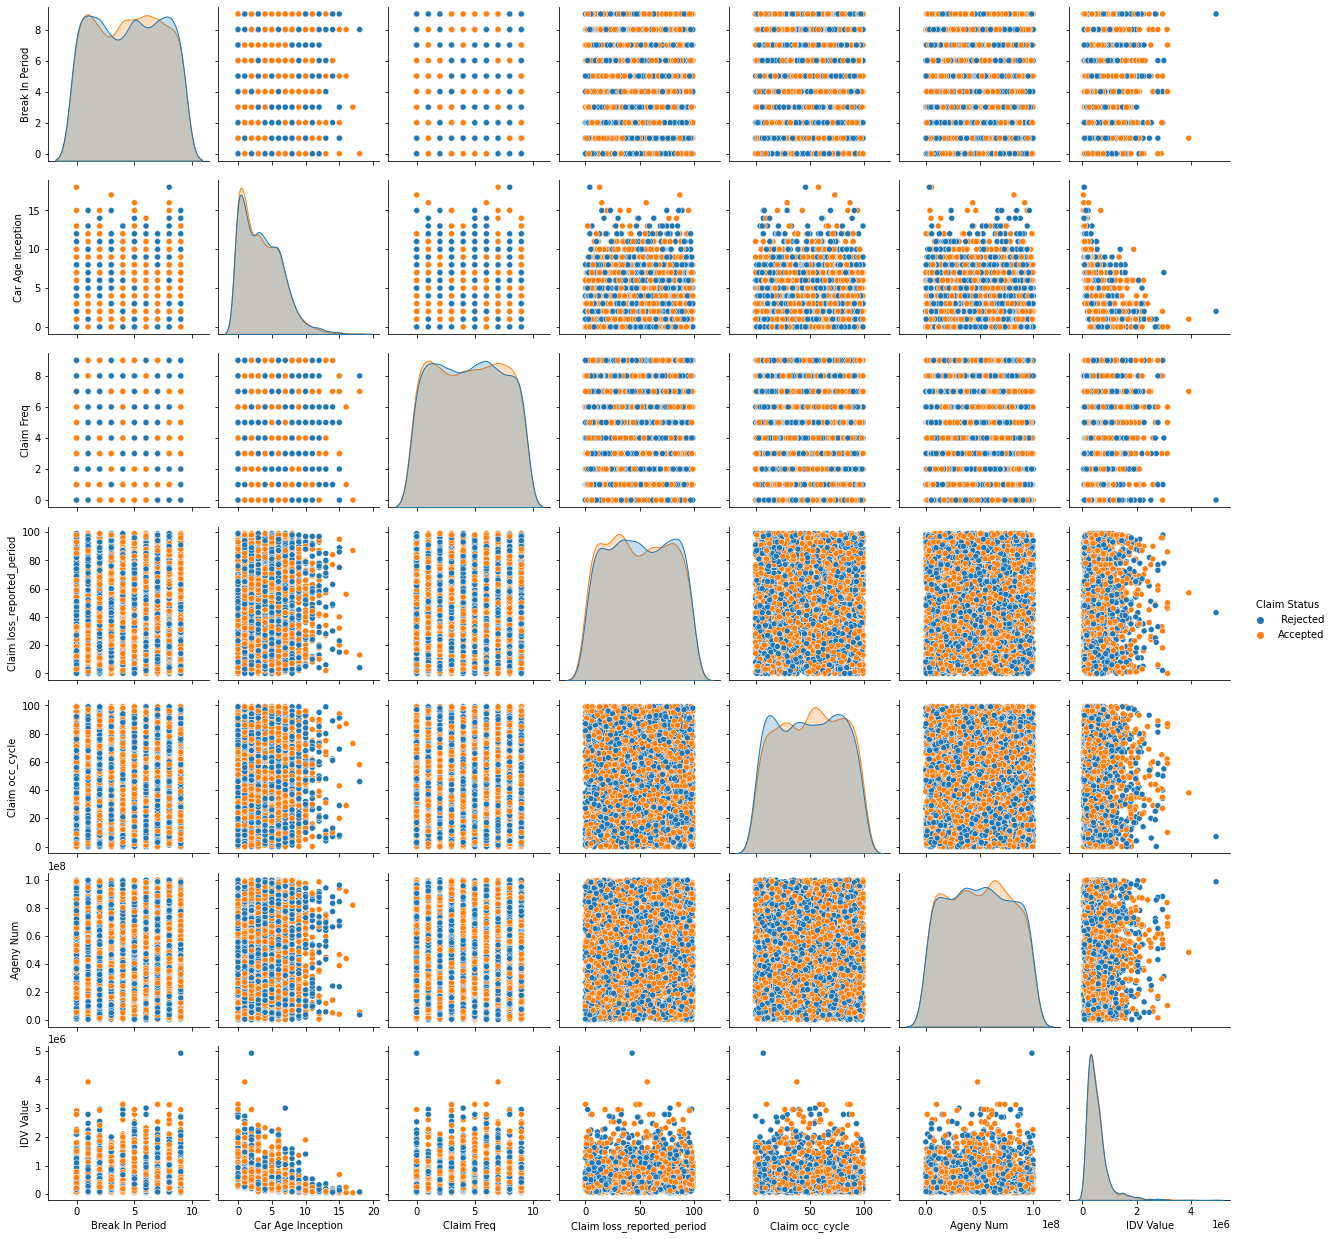

In [20]:
sns.pairplot(df,hue='Claim Status') # result 2.0

In [21]:
'''Conclusion: Acoording to result 2.0 all individual column that posses categorical data  
if we choose this columns independentaly than this thing will mess up our model 
 we needs to visualize the more categorical data (e.g Policy Type)'''

'Conclusion: Acoording to result 2.0 all individual column that posses categorical data  \nif we choose this columns independentaly than this thing will mess up our model \n we needs to visualize the more categorical data (e.g Policy Type)'

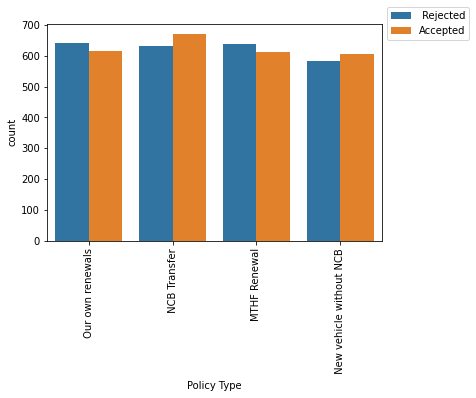

In [22]:
sns.countplot('Policy Type',hue='Claim Status',data=df_imp_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90);

In [23]:
px.histogram(data_frame=df_imp_data,
             x='Claim Element',
             color='Claim Status',
             color_discrete_sequence=px.colors.qualitative.Set1,
             facet_col='Type_Of_Payment',
             barmode='relative'
             )

In [24]:
px.histogram(data_frame=df_imp_data,
      x='Policy Type',
      color='Claim Status',
      facet_col='Type_Of_Payment',
      barmode='relative')

In [25]:
'''Here in above both plot just give us comparision between columns so we can not decide exactly what's going on
here we can say that rejected and accepted case equally distribute in this data set or
which type of payment category is frequently
we needs advanced visuliaztion'''

"Here in above both plot just give us comparision between columns so we can not decide exactly what's going on\nhere we can say that rejected and accepted case equally distribute in this data set or\nwhich type of payment category is frequently\nwe needs advanced visuliaztion"

In [26]:
df_imp_data.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'Policy Type',
       'Type_Of_Payment', 'IDV Value', 'Claim Element', 'Claim Status'],
      dtype='object')

In [27]:
df['Claim loss_reported_period'].unique()

array([66, 87, 53, 47, 99,  2, 50, 10,  5, 35,  8, 43,  1,  9, 80, 23, 69,
       63, 97, 45, 46, 21, 65, 70,  6, 61, 39, 15, 54, 11, 48, 81, 30, 76,
       98, 25,  7, 29, 55, 49, 36, 12, 85, 57, 17, 34, 51, 32, 71, 93, 33,
       92, 91, 58, 31, 72, 18,  4, 73, 60, 88,  0, 52, 67, 16, 40, 79, 95,
       26, 41, 62, 22, 83, 77, 86, 38, 82, 96, 68, 44, 37, 42, 59, 14, 13,
       84, 89, 78, 27, 74, 20, 28, 90, 56, 75, 19, 64, 94,  3, 24],
      dtype=int64)

In [28]:
fig1=px.sunburst(data_frame=df_imp_data,
                 path=['Claim Status','Claim Freq'],
                 color='Claim Status',
                 color_discrete_map={'Rejected':'red','Accepted':'Blue'},
                 
                )
fig1.update_traces(textinfo="label+percent parent")
fig1.show()

In [29]:
#we can't find relation ship or any important information  here everhiing is equally distributed  becauseabs 
# we don't know becaause lot's of column hiding their importance behind encode code

In [30]:
df_imp_data['Claim Status'][0]

' Rejected'

In [31]:
crm_df=df_imp_data.copy()

crm_df['Claim Status']=crm_df['Claim Status'].replace({' Rejected':0,'Accepted':1})

In [32]:
crm_df.head()

Break In Period  Car Age Inception  Claim Freq  Claim loss_reported_period  \
0                2                7.0           9                          66   
1                3                6.0           7                          87   
2                9                6.0           2                          53   
3                9                6.0           7                          47   
4                6                3.0           2                          99   

   Claim occ_cycle        Policy Type Type_Of_Payment  IDV Value  \
0               80   Our own renewals         Unknown   274920.0   
1               84       NCB Transfer   REIMBURSEMENT   283000.0   
2               51   Our own renewals         Unknown   283000.0   
3               95       MTHF Renewal         Unknown   260040.0   
4               58   Our own renewals        CASHLESS   318840.0   

               Claim Element  Claim Status  
0               PARTIAL LOSS             0  
1             NET OF SALVAGE             0  
2   OWNER DRIVER:BODY INJURY             0  
3         OWNER DRIVER:DEATH             0  
4         OWNER DRIVER:DEATH             1

In [33]:
crm_df.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'Policy Type',
       'Type_Of_Payment', 'IDV Value', 'Claim Element', 'Claim Status'],
      dtype='object')

# Feature selection process 

### method 1 : phi coefficient test

In [34]:
# Now we are performing the phi coefficient test so we identify the exactly relationship columns 


l1=[]
for i in crm_df.columns:

    if i not in  ['IDV Value','Claim Status']:
        df_t=pd.crosstab(crm_df['Claim Status'],crm_df[i])
    
        
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append((i,x))



        
l1

[('Break In Period', 0.04903712315377489),
 ('Car Age Inception', 0.04420024134661096),
 ('Claim Freq', 0.026798662178897006),
 ('Claim loss_reported_period', 0.13728563501466728),
 ('Claim occ_cycle', 0.16294829645750303),
 ('Policy Type', 0.023040346465422617),
 ('Type_Of_Payment', 0.032977866238625135),
 ('Claim Element', 0.026497155221191317)]

In [35]:
# here we identify the ['Claim loss_reported_period','Claim occ_cycle'] is correlate with the Claim status 

In [36]:
# one hot encoding use becaue we have no idea policy type or type of payment ordinality or sequence 
m=pd.get_dummies(df_imp_data.iloc[:,:-1]).dropna()
m['Claim Status']=df_imp_data['Claim Status'].replace({' Rejected':0,'Accepted':1})
m.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'IDV Value',
       'Policy Type_ NCB Transfer', 'Policy Type_ New vehicle without NCB',
       'Policy Type_ Our own renewals', 'Policy Type_MTHF Renewal',
       'Type_Of_Payment_ASSIGNEE', 'Type_Of_Payment_CASHLESS',
       'Type_Of_Payment_REIMBURSEMENT', 'Type_Of_Payment_Unknown',
       'Claim Element_ NET OF SALVAGE',
       'Claim Element_ OWNER DRIVER:BODY INJURY',
       'Claim Element_ OWNER DRIVER:DEATH', 'Claim Element_PARTIAL LOSS',
       'Claim Status'],
      dtype='object')

### After one hot encoding phi coefficient test

In [37]:
l1 = []
# Phie test
for i in m.columns:

    if i not in ['IDV Value', 'Claim Status']:
        df_t = pd.crosstab(m['Claim Status'], m[i])

        stat, p, dof, expected = st.chi2_contingency(df_t, correction=True)
        t = min(df_t.shape)-1
        deno = sum(df_t.sum())
        x = np.sqrt(stat / (deno))
        if (x > 0.045):
            l1.append((i, x))


l1

[('Break In Period', 0.04903712315377489),
 ('Claim loss_reported_period', 0.13728563501466728),
 ('Claim occ_cycle', 0.16294829645750303)]

In [38]:
#Now We are looking for IDV Value feature here we will find what is relationship
#between IDV and Claim Status 
# But How? t-test or anova analysis
px.histogram(data_frame=m,x='IDV Value',
             color='Claim Status',
             color_discrete_map={0:'red',1:'green'},opacity=0.7)


In [39]:
#  Here we can see data is left skewed so t-test and anova test both are fail (normal distribution)
# so we are performing manwhitneyu test 
data1=m[m['Claim Status']==0]['IDV Value']
data2=m[m['Claim Status']==1]['IDV Value']
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
stat, p = st.mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0) ')


data1: mean=536072.592 stdv=406717.804
data2: mean=538158.320 stdv=408621.718
Statistics=3092185.500, p=0.301
Same distribution (fail to reject H0)


In [40]:
'''Conclusion: We do not include IDV Value columns because 0 and 1 both follow the same distribution'''

'Conclusion: We do not include IDV Value columns because 0 and 1 both follow the same distribution'

### method 2: By selectKBest 

In [41]:
# After the one hot ancoding only  above columns is important  and correlate with claim status 
X=m.iloc[:,:-1]
y=m.iloc[:,-1]
X_train,X_test ,y_train,y_test=train_test_split(X,y,test_size = 0.33)

In [42]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)

    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [43]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
fs.scores_

array([2.89791162e-01, 4.17323103e+00, 1.58566046e+00, 1.66014888e+01,
       1.76255252e+01, 1.34962094e+05, 1.20655924e+00, 2.51219218e-02,
       1.58731845e-01, 7.87754167e-01, 9.96420048e-01, 1.09019437e-02,
       6.99676473e-01, 1.23557887e-01, 2.43746046e-01, 7.09769636e-01,
       4.96796299e-02, 1.60710686e-02])

In [44]:
fs_feature=pd.DataFrame({'Feature':X_train.columns,"fs":fs.scores_,"fs_p":fs.pvalues_})
fs_feature=fs_feature.sort_values(by="fs_p",ascending=True)
fs_feature

Feature             fs      fs_p
5                                 IDV Value  134962.093957  0.000000
4                           Claim occ_cycle      17.625525  0.000027
3                Claim loss_reported_period      16.601489  0.000046
1                         Car Age Inception       4.173231  0.041067
2                                Claim Freq       1.585660  0.207947
6                 Policy Type_ NCB Transfer       1.206559  0.272015
10                 Type_Of_Payment_ASSIGNEE       0.996420  0.318178
9                  Policy Type_MTHF Renewal       0.787754  0.374780
15  Claim Element_ OWNER DRIVER:BODY INJURY       0.709770  0.399520
12            Type_Of_Payment_REIMBURSEMENT       0.699676  0.402892
0                           Break In Period       0.289791  0.590354
14            Claim Element_ NET OF SALVAGE       0.243746  0.621514
8             Policy Type_ Our own renewals       0.158732  0.690327
13                  Type_Of_Payment_Unknown       0.123558  0.725207
16        Claim Element_ OWNER DRIVER:DEATH       0.049680  0.823622
7      Policy Type_ New vehicle without NCB       0.025122  0.874064
17               Claim Element_PARTIAL LOSS       0.016071  0.899121
11                 Type_Of_Payment_CASHLESS       0.010902  0.916842

In [45]:
fs_feature[fs_feature['fs_p']<0.045]['Feature'] #hypothesis p value use 
# Below five imporant feature 

5                     IDV Value
4               Claim occ_cycle
3    Claim loss_reported_period
1             Car Age Inception
Name: Feature, dtype: object

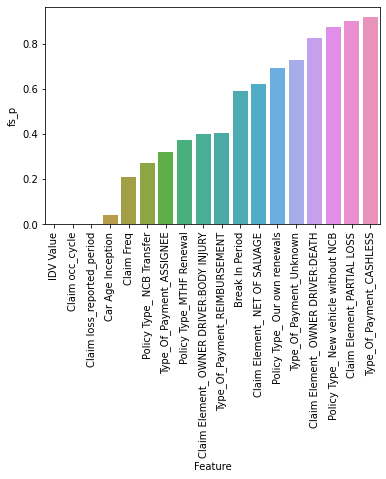

In [46]:
sns.barplot(fs_feature['Feature'], fs_feature['fs_p'])
plt.xticks(rotation=90);
plt.show()

In [47]:
# little bit visualization what's inside in this selected featureabs 

In [48]:
fig1=px.sunburst(data_frame=df_imp_data,
                 path=['Claim Status','Claim loss_reported_period'],
                 color='Claim Status',
                 color_discrete_map={'Rejected':'red','Accepted':'Blue'},
                 title="Claim loss_reported_period and Claim Status"
                 
                )
fig1.update_traces(textinfo="label+percent parent")
fig1.show()

In [49]:
fig1=px.sunburst(data_frame=df_imp_data,
                 path=['Claim Status','Claim occ_cycle'],
                 color='Claim Status',
                 color_discrete_map={'Rejected':'red','Accepted':'Blue'},
                 title="Claim loss_reported_period and Claim Status"
                 
                )
fig1.update_traces(textinfo="label+percent parent")
fig1.show()

In [50]:
m.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'IDV Value',
       'Policy Type_ NCB Transfer', 'Policy Type_ New vehicle without NCB',
       'Policy Type_ Our own renewals', 'Policy Type_MTHF Renewal',
       'Type_Of_Payment_ASSIGNEE', 'Type_Of_Payment_CASHLESS',
       'Type_Of_Payment_REIMBURSEMENT', 'Type_Of_Payment_Unknown',
       'Claim Element_ NET OF SALVAGE',
       'Claim Element_ OWNER DRIVER:BODY INJURY',
       'Claim Element_ OWNER DRIVER:DEATH', 'Claim Element_PARTIAL LOSS',
       'Claim Status'],
      dtype='object')

In [51]:
fig1=px.scatter_3d(data_frame=m,
              x='Claim occ_cycle',
              
              y='Claim loss_reported_period',z='IDV Value',
              color='Claim Status',
              symbol='Claim Status',
              opacity=1)
fig1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig1.show()

### method 3: RFE

In [52]:
X=m.iloc[:,:-1]
y=m.iloc[:,-1]
X_train,X_test ,y_train,y_test=train_test_split(X,y,test_size = 0.33)

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
rfe = RFE(model, 4)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_,X_train.columns[fit.support_])
print("Feature Ranking: %s" % fit.ranking_)
# And
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)


feature_dict=dict(sorted(zip(X_train.columns,clf.feature_importances_),key=lambda x:x[1],reverse=True))
feature_dict

Num Features: 4
Selected Features: [False False  True  True  True  True False False False False False False
 False False False False False False] Index(['Claim Freq', 'Claim loss_reported_period', 'Claim occ_cycle',
       'IDV Value'],
      dtype='object')
Feature Ranking: [ 2  3  1  1  1  1 11  4  9  7 15  6 14 13 12 10  5  8]


{'IDV Value': 0.3315694708397446,
 'Claim loss_reported_period': 0.20824489424283688,
 'Claim occ_cycle': 0.12181856395216928,
 'Type_Of_Payment_REIMBURSEMENT': 0.07042141820290387,
 'Break In Period': 0.05747588706992618,
 'Claim Freq': 0.05315380602689992,
 'Policy Type_ Our own renewals': 0.04672216843306764,
 'Car Age Inception': 0.03302127183595779,
 'Type_Of_Payment_CASHLESS': 0.02729264558183641,
 'Claim Element_ OWNER DRIVER:DEATH': 0.026134097742891705,
 'Policy Type_ NCB Transfer': 0.02414577607176564,
 'Policy Type_ New vehicle without NCB': 0.0,
 'Policy Type_MTHF Renewal': 0.0,
 'Type_Of_Payment_ASSIGNEE': 0.0,
 'Type_Of_Payment_Unknown': 0.0,
 'Claim Element_ NET OF SALVAGE': 0.0,
 'Claim Element_ OWNER DRIVER:BODY INJURY': 0.0,
 'Claim Element_PARTIAL LOSS': 0.0}

### method 4: ExtraTreeClassifier

In [54]:
X=m.iloc[:,:-1]
y=m.iloc[:,-1]
X_train,X_test ,y_train,y_test=train_test_split(X,y,test_size = 0.33)

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
feature_dict=dict(sorted(zip(X_train.columns,model.feature_importances_),key=lambda x:x[1],reverse=True))
feature_dict

{'IDV Value': 0.16044336908853457,
 'Claim occ_cycle': 0.1601945633140033,
 'Claim loss_reported_period': 0.15849908676110297,
 'Claim Freq': 0.13283114758358694,
 'Car Age Inception': 0.13195440378647333,
 'Break In Period': 0.1279362744779095,
 'Policy Type_ Our own renewals': 0.014503374224730876,
 'Policy Type_ NCB Transfer': 0.014497563372933692,
 'Claim Element_PARTIAL LOSS': 0.014020536011431944,
 'Claim Element_ NET OF SALVAGE': 0.01355968752289965,
 'Type_Of_Payment_Unknown': 0.013012671094717206,
 'Claim Element_ OWNER DRIVER:DEATH': 0.012664465456184762,
 'Type_Of_Payment_CASHLESS': 0.012370731278335715,
 'Type_Of_Payment_REIMBURSEMENT': 0.009760464963747205,
 'Claim Element_ OWNER DRIVER:BODY INJURY': 0.008248374577724652,
 'Policy Type_MTHF Renewal': 0.007738086470558116,
 'Policy Type_ New vehicle without NCB': 0.007465784409686918,
 'Type_Of_Payment_ASSIGNEE': 0.0002994156054386566}

In [91]:
print(l1)
l2=[]
for i in l1:
    l2.append(i[0])
    

    

[('Break In Period', 0.04903712315377489), ('Claim loss_reported_period', 0.13728563501466728), ('Claim occ_cycle', 0.16294829645750303)]


### method 5: PCA

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(m.iloc[:,:-1])

In [109]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [110]:
principalDf

pc1        pc2
0    -2.621969e+05  -9.376627
1    -2.541169e+05   2.638997
2    -2.541169e+05   1.903980
3    -2.770769e+05 -33.410282
4    -2.182769e+05  29.457954
...            ...        ...
4990  1.212883e+06 -34.915389
4991 -1.771169e+05  34.370698
4992  2.477931e+05 -26.890284
4993 -2.931692e+04  68.852285
4994  4.160308e+04 -28.074844

[4995 rows x 2 columns]

In [111]:
finalDf = pd.concat([principalDf, m['Claim Status']] ,axis = 1) 

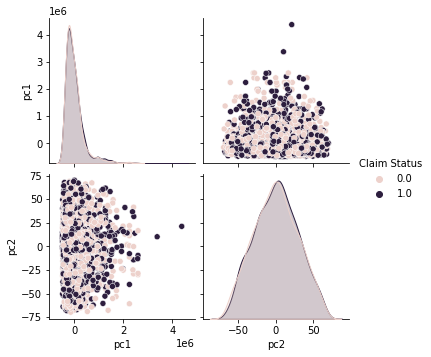

In [112]:
sns.pairplot( finalDf,hue='Claim Status')

In [114]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset


def get_dataset():
    X, y = m.iloc[:,:-1],m.iloc[:,-1]
    return X, y

# get a list of models to evaluate


def get_models():
    models = dict()
    for i in range(1, 21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation


def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.493 (0.015)
>2 0.497 (0.019)
>3 0.497 (0.020)
>4 0.497 (0.020)
>5 0.497 (0.020)
>6 0.497 (0.020)
>7 0.497 (0.020)
>8 0.497 (0.020)
>9 0.497 (0.020)
>10 0.497 (0.020)
>11 0.497 (0.020)
>12 0.497 (0.020)
>13 0.497 (0.020)
>14 0.497 (0.020)
>15 0.497 (0.020)
>16 0.497 (0.020)
>17 0.497 (0.020)
>18 0.497 (0.020)


ValueError: n_components=19 must be between 0 and min(n_samples, n_features)=18 with svd_solver='full'

### So our final feature is according to method 1:
['Break In Period','Claim loss_reported_period','Claim occ_cycle']

In [92]:
#spliting data
X_train,X_test,y_train,y_test=train_test_split(m[l2],m['Claim Status'],test_size=0.33)

# Machine learning model 1: KNN Algorithms

In [93]:
from sklearn.neighbors import KNeighborsClassifier 
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5063674954517889

In [94]:
clf=KNeighborsClassifier( n_neighbors=7)
#accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5,n_jobs=-1))
# use AUC as scoring metric
print('Cross-validation (precision)', cross_val_score(clf, X, y, cv=5, scoring = 'precision',n_jobs=-1))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall',n_jobs=-1))
# use f1 score as scoring metric
print('Cross-validation (f1_micro)', cross_val_score(clf, X, y, cv=5, scoring = 'f1_micro',n_jobs=-1))

Cross-validation (accuracy) [0.4984985  0.49049049 0.5045045  0.49149149 0.50950951]
Cross-validation (precision) [0.49899396 0.49079755 0.50458716 0.49206349 0.51089109]
Cross-validation (recall) [0.496      0.48       0.55       0.496      0.51497006]
Cross-validation (f1_micro) [0.4984985  0.49049049 0.5045045  0.49149149 0.50950951]


In [95]:
clf=KNeighborsClassifier()
grid_values = {'n_neighbors': [1, 2, 4, 8, 16, 20, 20]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)


print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'precision')
grid_clf_auc.fit(X_train, y_train)
 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)


Grid best parameter (max. accuracy):  {'n_neighbors': 16}
Grid best score (accuracy):  0.5170394663454031
Grid best parameter (max. accuracy):  {'n_neighbors': 16}
Grid best score (accuracy):  0.5170394663454031


# Machine learning model 2: Logistics Algorithms

In [96]:
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5191024863553669

In [97]:
clf=LogisticRegression()

In [98]:
#accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5,n_jobs=-1))
# use AUC as scoring metric
print('Cross-validation (precision)', cross_val_score(clf, X, y, cv=5, scoring = 'precision',n_jobs=-1))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall',n_jobs=-1))
# use f1 score as scoring metric
print('Cross-validation (f1_micro)', cross_val_score(clf, X, y, cv=5, scoring = 'f1_micro',n_jobs=-1))

Cross-validation (accuracy) [0.5005005  0.5005005  0.50550551 0.5005005  0.4984985 ]
Cross-validation (precision) [0.5005005  0.5005005  0.50681818 0.5005005  0.        ]
Cross-validation (recall) [1.    1.    0.446 1.    0.   ]
Cross-validation (f1_micro) [0.5005005  0.5005005  0.50550551 0.5005005  0.4984985 ]


In [99]:
clf=LogisticRegression()
grid_values = {'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'precision')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'C': 0.001}
Grid best score (accuracy):  0.5012047386386453
Test set AUC:  0.5328921238367867
Grid best parameter (max. AUC):  {'C': 0.001}
Grid best score (AUC):  0.5014164512215692


# Machine learning model 3: svm

In [100]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
clf=SVC(kernel='rbf', C=1)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5057610673135233

In [101]:
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5,n_jobs=-1))
# use AUC as scoring metric
print('Cross-validation (precision)', cross_val_score(clf, X, y, cv=5, scoring = 'precision',n_jobs=-1))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall',n_jobs=-1))
# use f1 score as scoring metric
print('Cross-validation (f1_micro)', cross_val_score(clf, X, y, cv=5, scoring = 'f1_micro',n_jobs=-1))

Cross-validation (accuracy) [0.52652653 0.4994995  0.46846847 0.52152152 0.5025025 ]
Cross-validation (precision) [0.52036199 0.5        0.47788873 0.5193662  0.50374532]
Cross-validation (recall) [0.69       0.6        0.67       0.59       0.53692615]
Cross-validation (f1_micro) [0.52652653 0.4994995  0.46846847 0.52152152 0.5025025 ]


In [102]:
clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'precision')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.51285411507485
Test set AUC:  0.5201089147070159
Grid best parameter (max. AUC):  {'gamma': 10}
Grid best score (AUC):  0.526015031395686


In [104]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.4966646452395391

In [105]:
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5,n_jobs=-1))
# use AUC as scoring metric
print('Cross-validation (precision)', cross_val_score(clf, X, y, cv=5, scoring = 'precision',n_jobs=-1))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall',n_jobs=-1))
# use f1 score as scoring metric
print('Cross-validation (f1_micro)', cross_val_score(clf, X, y, cv=5, scoring = 'f1_micro',n_jobs=-1))

Cross-validation (accuracy) [0.51751752 0.51251251 0.49349349 0.4974975  0.4954955 ]
Cross-validation (precision) [0.50988142 0.51625239 0.47540984 0.49518304 0.50202429]
Cross-validation (recall) [0.52       0.532      0.48       0.51       0.49101796]
Cross-validation (f1_micro) [0.5035035  0.51151151 0.5015015  0.51951952 0.50650651]


In [106]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5142510612492419

In [63]:
import dtale
import pandas as pd
# df = pd.read_csv("../../data/Car Insurance Claim Propensity/final_data.csv")
# d = dtale.show(df)
# d.open_browser()